In [1]:
import pandas as pd
import matplotlib.pyplot as plt

C:\Users\EZEN\AppData\Local\Temp\ipykernel_8064\1492400551.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
df = pd.read_csv('terror.csv')

In [4]:
df.head()

,iyear,imonth,iday,country_txt,region_txt,attacktype1_txt,attacktype2_txt,attacktype3_txt
0,1970,7,2,Dominican Republic,Central America & Caribbean,Assassination,NaN,NaN
1,1970,0,0,Mexico,North America,Hostage Taking (Kidnapping),NaN,NaN
2,1970,1,0,Philippines,Southeast Asia,Assassination,NaN,NaN
3,1970,1,0,Greece,Western Europe,Bombing/Explosion,NaN,NaN
4,1970,1,0,Japan,East Asia,Facility/Infrastructure Attack,NaN,NaN


In [5]:
# 결측치의 개수를 확인 
df.isna().sum()

iyear                   0
imonth                  0
iday                    0
country_txt             0
region_txt              0
attacktype1_txt         0
attacktype2_txt    201272
attacktype3_txt    209048
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209706 entries, 0 to 209705
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   iyear            209706 non-null  int64 
 1   imonth           209706 non-null  int64 
 2   iday             209706 non-null  int64 
 3   country_txt      209706 non-null  object
 4   region_txt       209706 non-null  object
 5   attacktype1_txt  209706 non-null  object
 6   attacktype2_txt  8434 non-null    object
 7   attacktype3_txt  658 non-null     object
dtypes: int64(3), object(5)
memory usage: 12.8+ MB


In [15]:
# df 데이터프레임에 있는 iyear,imonth,iday 데이터들을 모아서 시계열 데이터로 변경 

# int 데이터 타입의 스리즈를 문자 데이터 타입으로 변경 
str(df['iyear']) # 스리즈 데이터는 문자형으로 변환 
date = df['iyear'].astype('str') + '-' + \
df['imonth'].astype('str').replace('0','1') + '-' + \
df['iday'].astype('str').replace('0','1')

In [16]:
# date 스리즈를 시계열 데이터로 변경하여 df 새로운 파생변수 생성 
df['date'] = pd.to_datetime(date, format = '%Y-%m-%d')

In [17]:
df.head()

,iyear,imonth,iday,country_txt,region_txt,attacktype1_txt,attacktype2_txt,attacktype3_txt,date
0,1970,7,2,Dominican Republic,Central America & Caribbean,Assassination,NaN,NaN,1970-07-02
1,1970,0,0,Mexico,North America,Hostage Taking (Kidnapping),NaN,NaN,1970-01-01
2,1970,1,0,Philippines,Southeast Asia,Assassination,NaN,NaN,1970-01-01
3,1970,1,0,Greece,Western Europe,Bombing/Explosion,NaN,NaN,1970-01-01
4,1970,1,0,Japan,East Asia,Facility/Infrastructure Attack,NaN,NaN,1970-01-01


In [19]:
## 한국의 테러 데이터를 로드 
flag = df['country_txt'] == 'South Korea' 
korea_data = df.loc[flag,]


In [23]:
korea_data.groupby('attacktype1_txt').count()['date']

attacktype1_txt
Armed Assault                      5
Assassination                      3
Bombing/Explosion                  5
Facility/Infrastructure Attack    15
Hostage Taking (Kidnapping)        2
Unarmed Assault                    4
Unknown                            6
Name: date, dtype: int64

<Axes: xlabel='attacktype1_txt'>

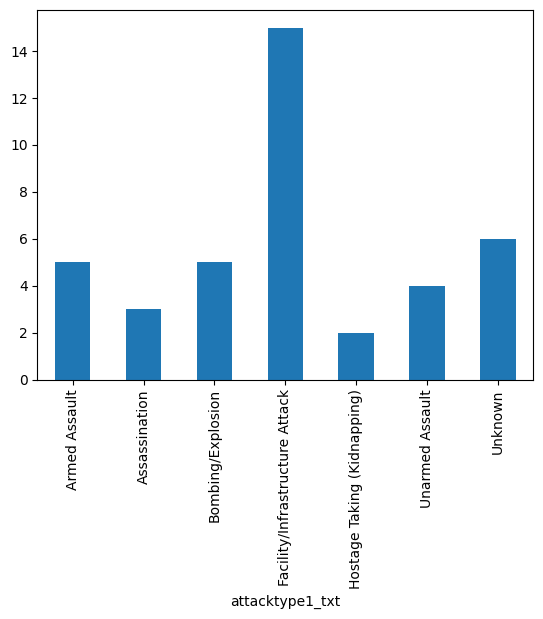

In [24]:
korea_data.groupby('attacktype1_txt').count()['date'].plot(kind = "bar")

In [25]:
# 대륙별 테러의 횟수를 그래프 출력 

df.groupby('region_txt').count()['attacktype1_txt']

region_txt
Australasia & Oceania            325
Central America & Caribbean    10386
Central Asia                     580
East Asia                        847
Eastern Europe                  5326
Middle East & North Africa     58252
North America                   3847
South America                  19846
South Asia                     54725
Southeast Asia                 14498
Sub-Saharan Africa             23746
Western Europe                 17328
Name: attacktype1_txt, dtype: int64

In [27]:
region_data = df.groupby('region_txt').count()['attacktype1_txt']

<Axes: ylabel='region_txt'>

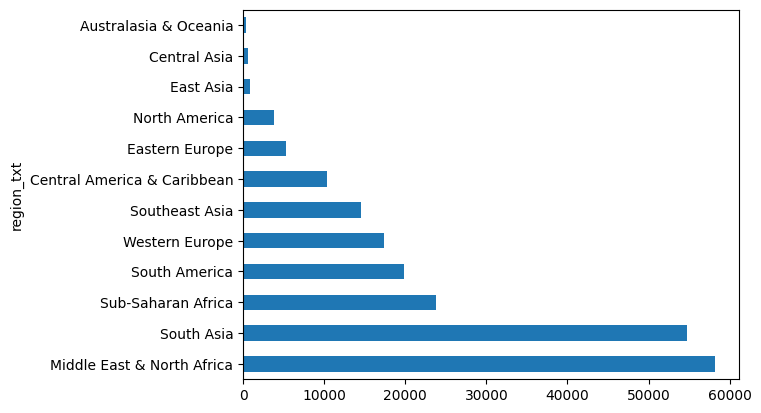

In [32]:
region_data.sort_values(ascending = False).plot(kind = "barh")
# 시리즈라 밸류값의 기준이 필요 없음. 
# 그래프 회전 시킬때 bar뒤에 h추가 


In [34]:
# 2015년부터의 데이터만 필터링
df_2015_after = df.loc[df['iyear'] >=2015,]

In [36]:
group_data = df_2015_after.groupby('region_txt').count()['attacktype1_txt']

In [38]:
# groupdata 내림차순 정렬 

group_data = group_data.sort_values(ascending=False) 

<function matplotlib.pyplot.show(close=None, block=None)>

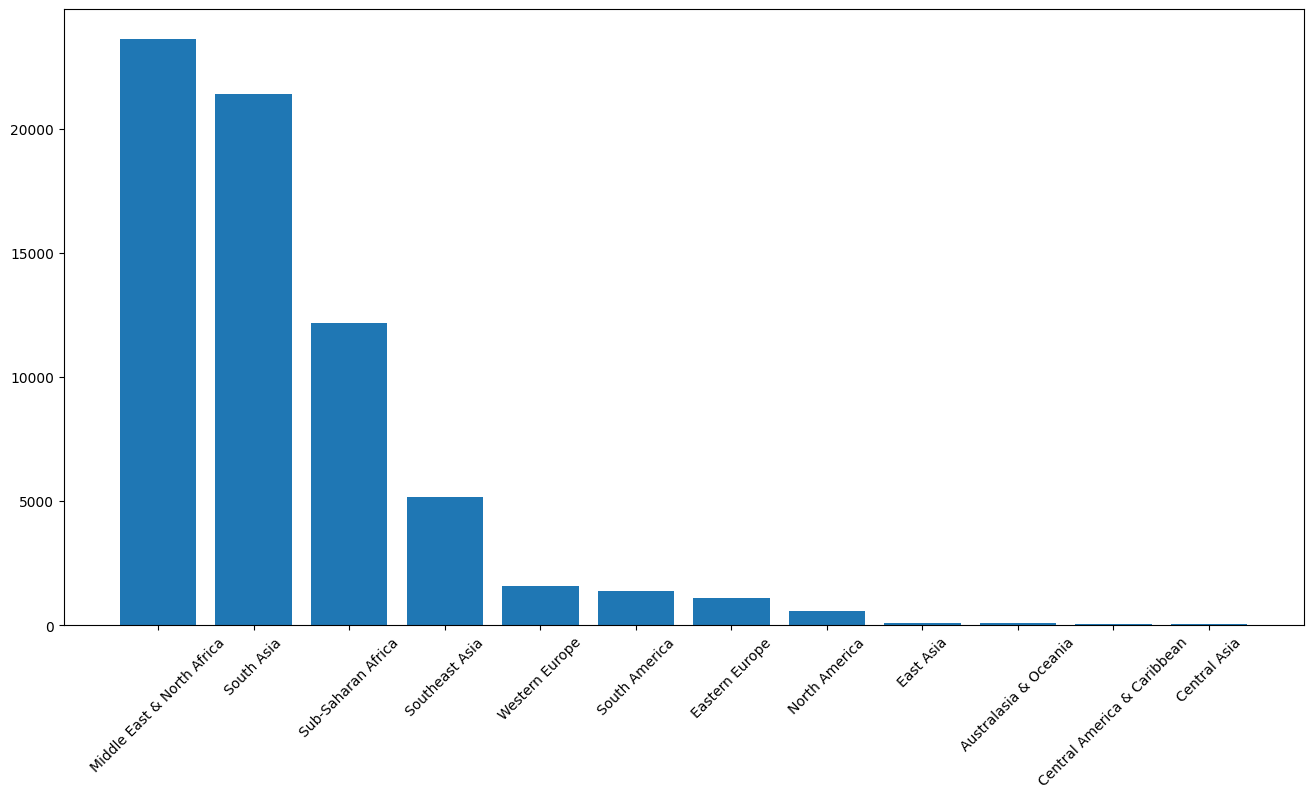

In [42]:
# matplot으로 그래프 시각화 
x = group_data.index
y = group_data.values 

plt.figure(figsize=(16,8))
plt.bar(x,y)
# 죽어도 표를 세워서 보고 싶고 아래 글자 교차되는거 방지 
plt.xticks(rotation = 45)
plt.show

In [56]:
# 남부 아시아의 데이터만 필터링 년도 1990년 이후 

flag = (df['region_txt'] == 'South Asia') & (df['iyear'] >= 1990)
south_asia_data = df.loc[flag,] 

In [60]:
pd.pivot_table(
    south_asia_data,
    index = 'iyear', 
    columns = 'country_txt', 
    values = 'attacktype1_txt',
    aggfunc= 'count', 
    fill_value = 0 
)

country_txt,Afghanistan,Bangladesh,Bhutan,India,Maldives,Nepal,Pakistan,Sri Lanka
iyear,,,,,,,,
1990,2,22,0,349,0,0,87,140
1991,30,42,0,339,0,1,150,115
1992,36,76,0,237,0,8,85,103
1994,9,68,0,107,0,3,154,35
1995,6,74,0,179,0,0,666,126
1996,4,161,0,213,0,5,180,176
1997,1,17,0,193,0,9,206,63
1998,1,2,0,61,0,0,37,35
1999,9,11,0,112,0,8,39,46


<Axes: xlabel='iyear'>

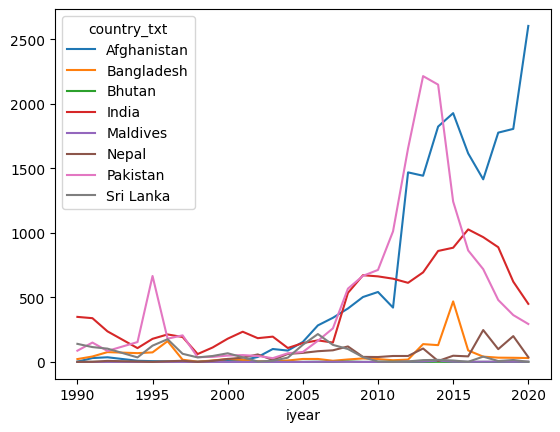

In [61]:
pd.pivot_table(
    south_asia_data,
    index = 'iyear', 
    columns = 'country_txt', 
    values = 'attacktype1_txt',
    aggfunc= 'count', 
    fill_value = 0 
).plot()

<Axes: ylabel='iyear'>

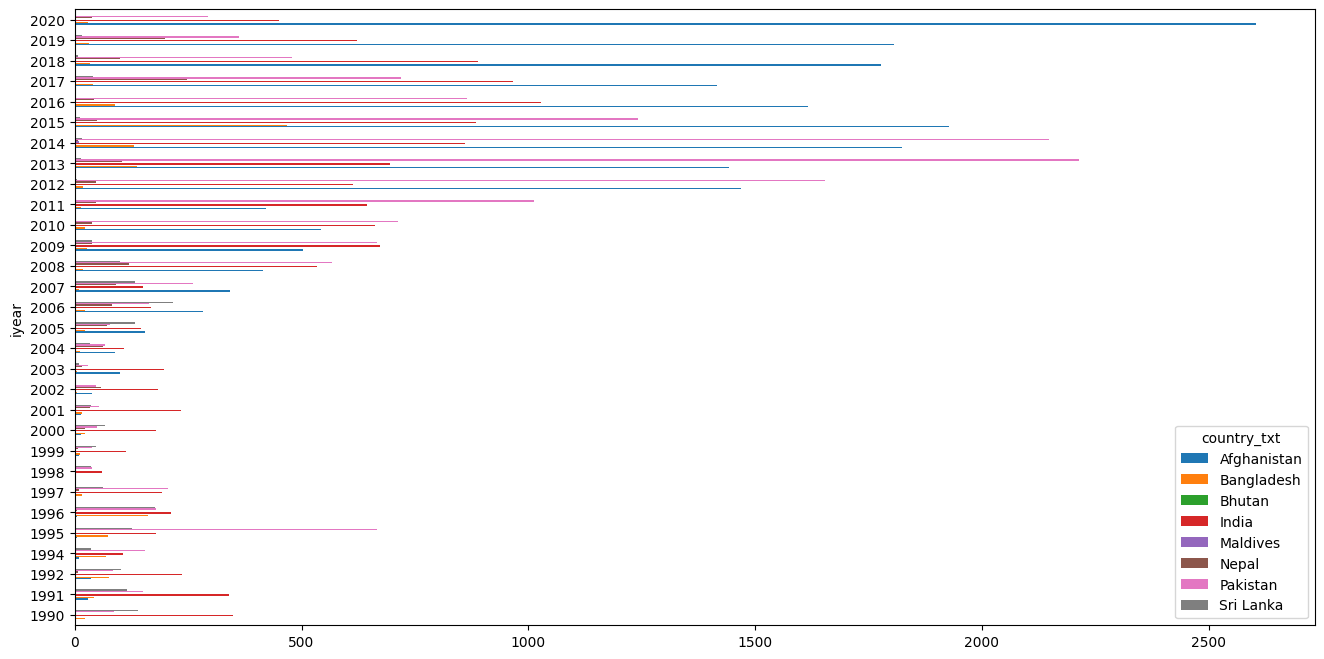

In [64]:
pd.pivot_table(
    south_asia_data,
    index = 'iyear', 
    columns = 'country_txt', 
    values = 'attacktype1_txt',
    aggfunc= 'count', 
    fill_value = 0 
).plot(kind="barh",figsize=(16,8))

In [73]:
# south_asia_data에서 몇개의 국가가 있는가? 

_list = south_asia_data['country_txt'].unique()

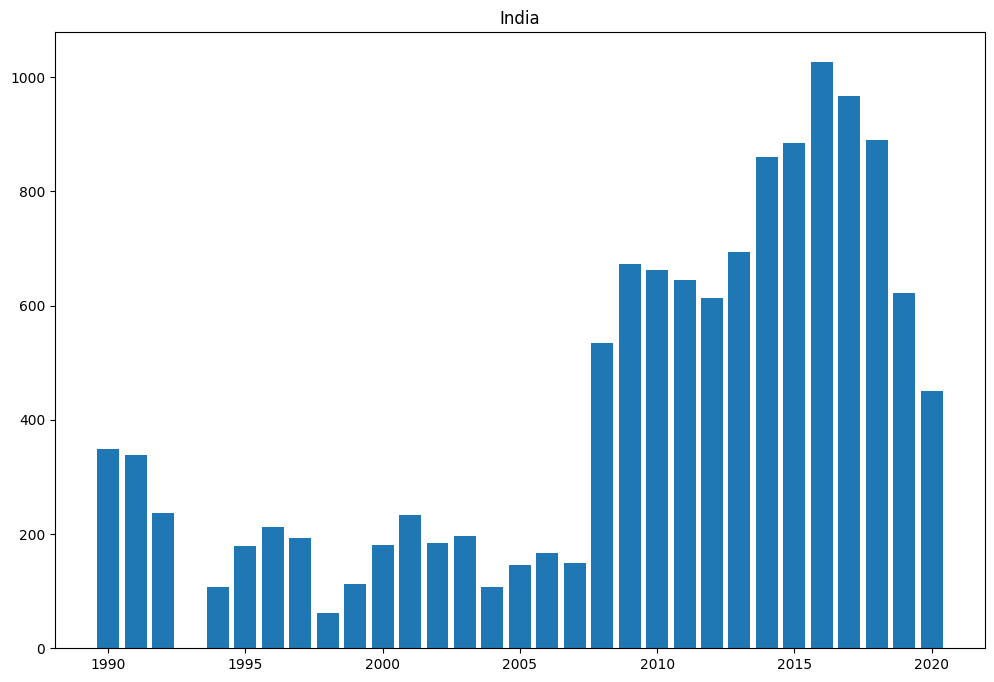

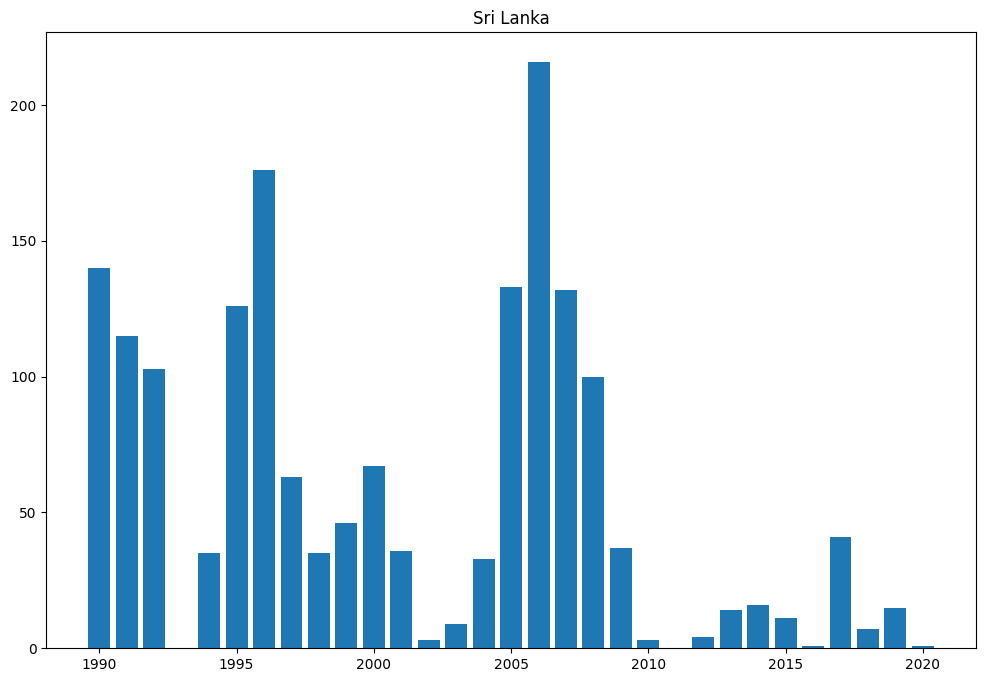

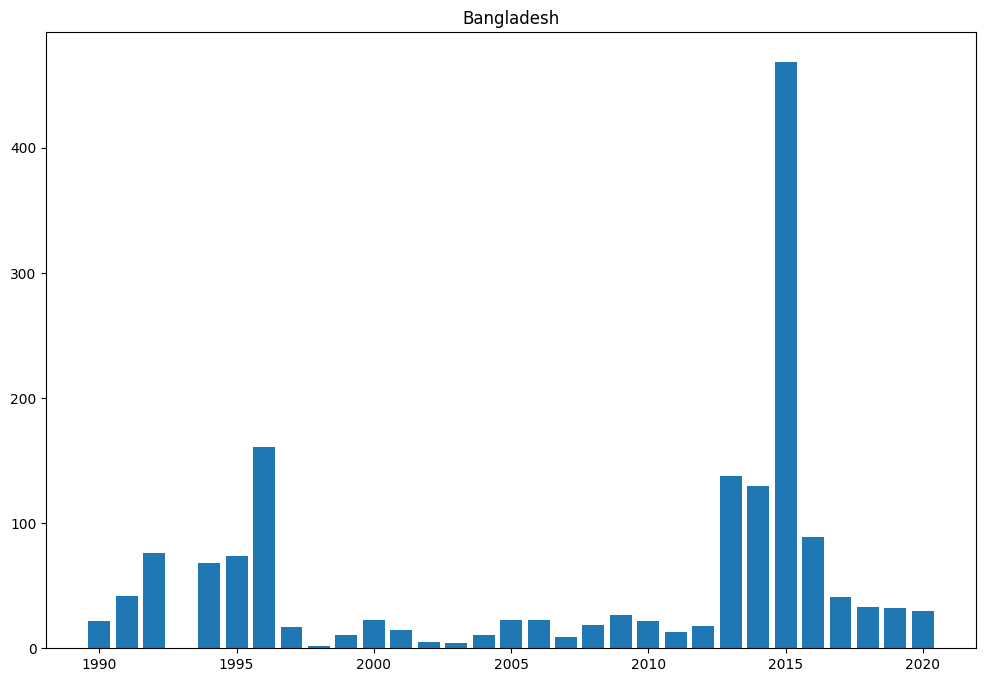

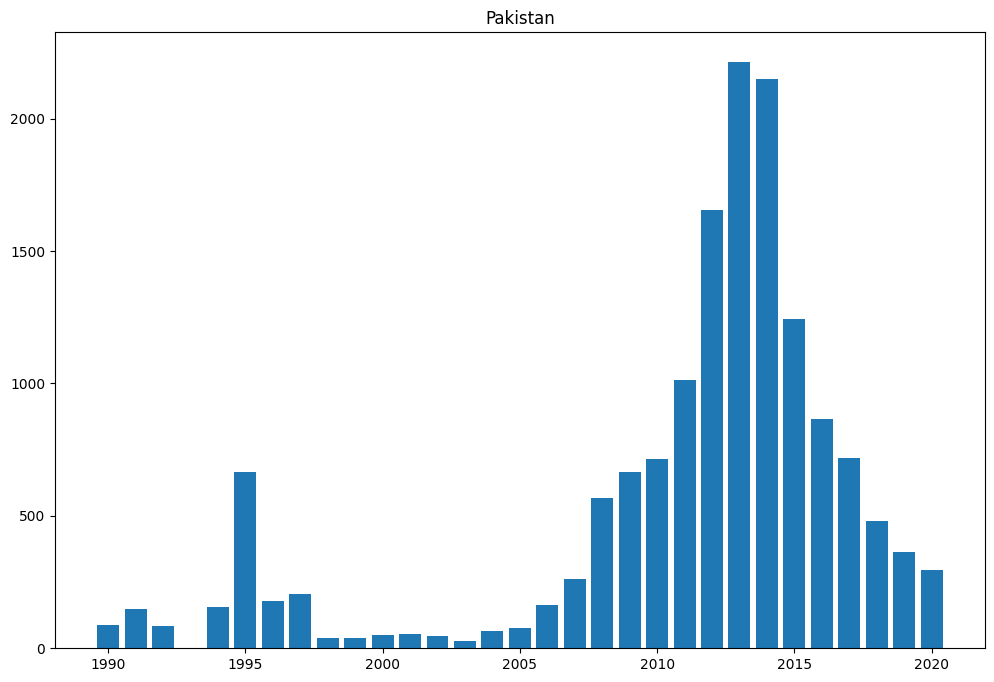

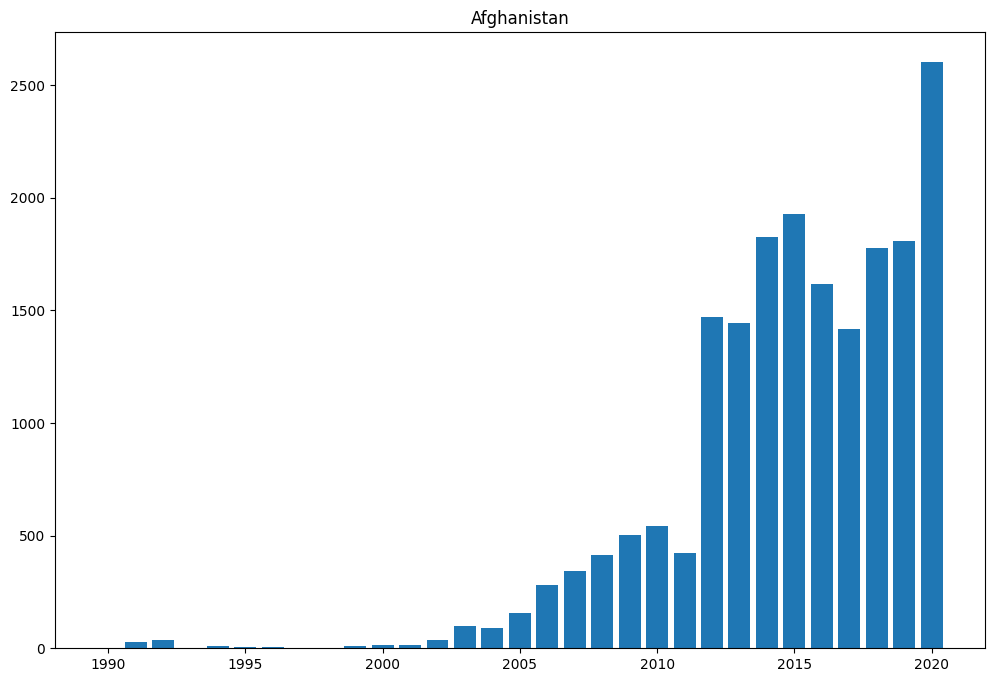

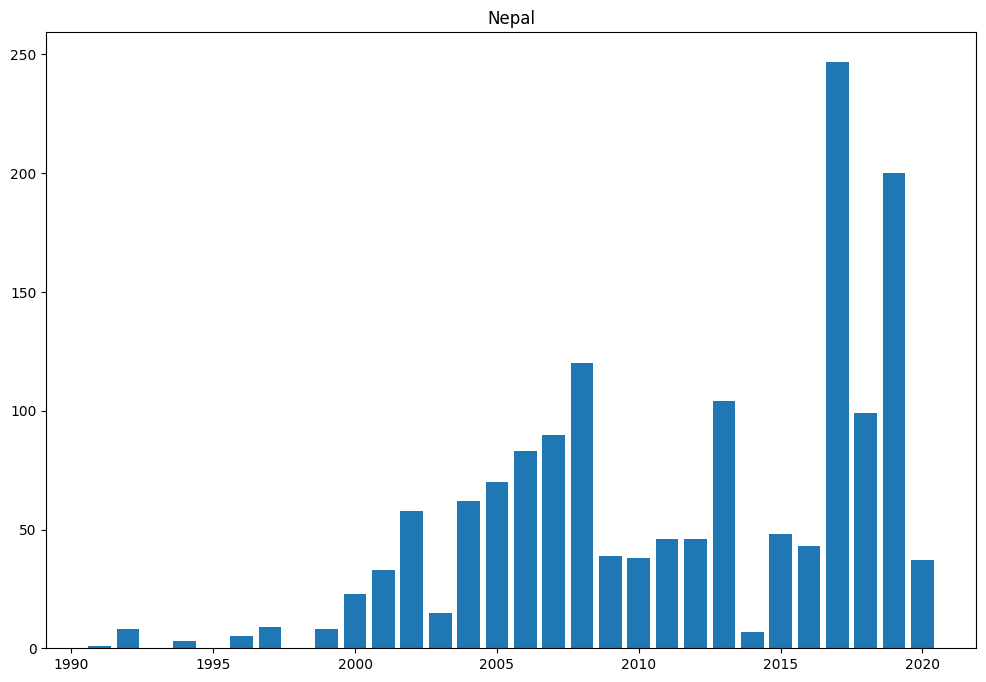

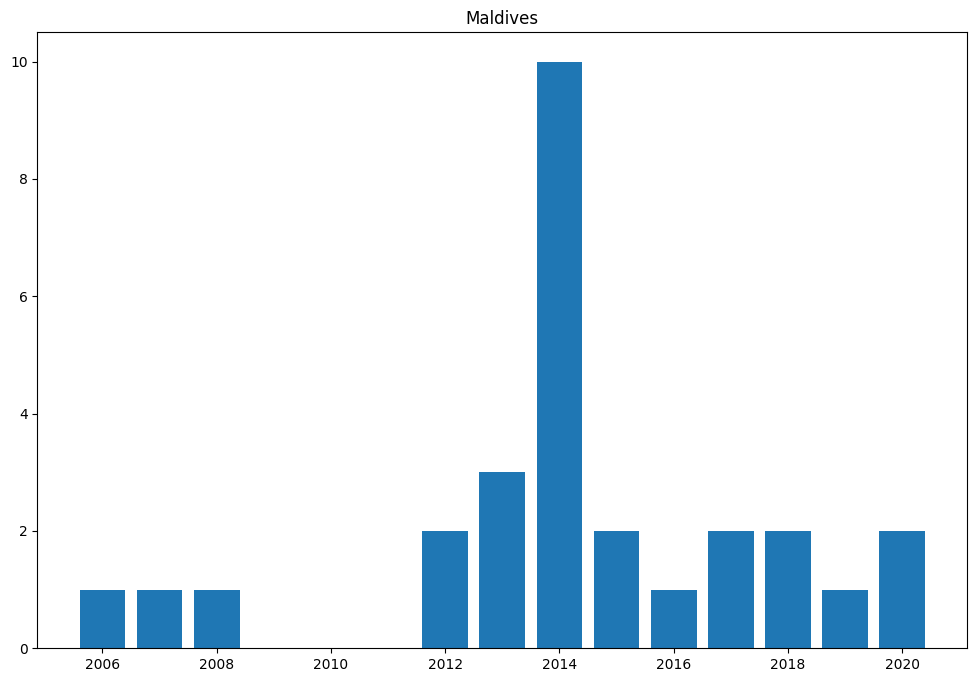

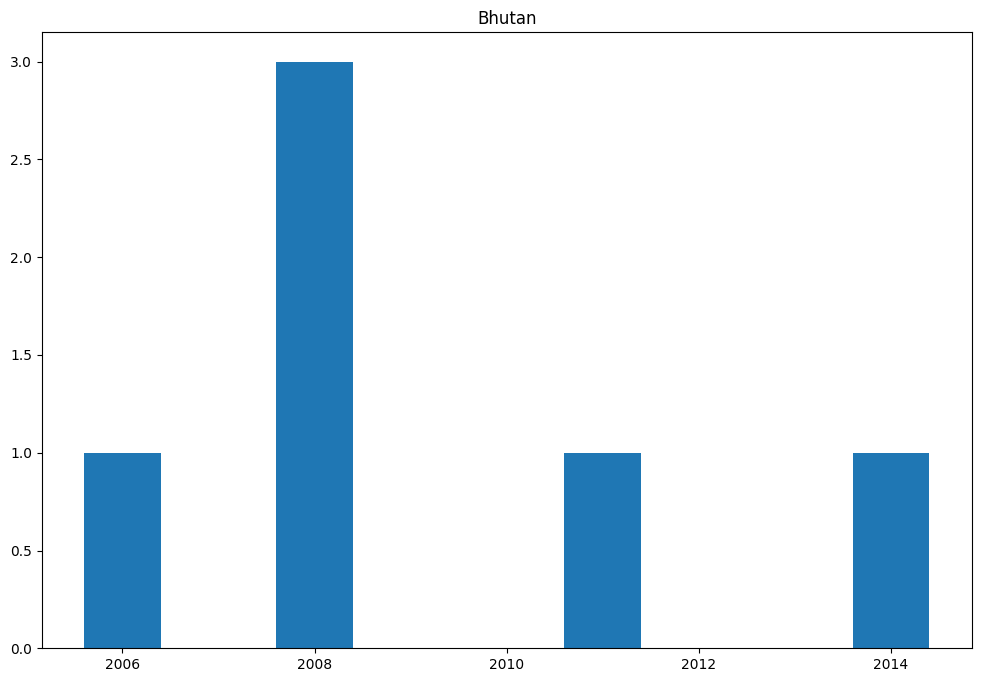

In [78]:
for country in _list: 
    # country : 국가의 이름들이 하나씩 대입하여 실행 
    # print(country)
    data = south_asia_data.loc[south_asia_data['country_txt']== country,]
    group_data = data.groupby('iyear').count()['attacktype1_txt']
    # 그래프 시각화 
    x = group_data.index
    y = group_data.values 
    plt.figure(figsize=(12,8))
    plt.bar(x,y)
    plt.title(country)
    plt.show()